# Deaths per Million in different countries plot 

Death cases of a country are based on the dataset provided by JHU, Deaths. These countries are affected of SARS Covid-19 (aka Corona virus) outbreak. The dataset consist of countries and datewise cases. 

This script fetches the online datasets and parses through them for the required countries and plot them in line-plots format.<br>
The plot in the end shows cumulative Deaths per Million (DPM) of some countries based on date (more countries can be added and subtracted from that list). Last day data of DPM is printed and some other DPM are marked for some dates(last 5th/ 10th day). One can see rate of increase of deaths from the plot and also compare it with other countries.

DPM of country = no. of deaths/total population

Popoulation of country is based on a dataset provided by World Bank: https://data.worldbank.org/indicator/SP.POP.TOTL. Although some changes have been done manually to the dataset, so the new dataset is imported directly from the system.

Datasets can be found here: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series 
[Official github link]

Note: Country name being used in code is compulsorily same as in datasets' column *'Country/Region'*

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime

### Import and Load Datasets
#### Deaths Global
In link provided above one can see various datasets in form of comma separated files(csv), we will import for Deaths due to Covid-19:
 *'time_series_covid19_deaths_global.csv'*

In [2]:
Death_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
Death_cases.iloc[0:5,:] # Printing data explicitly

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,109,115,120,122,127,132,136,153,168,169
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,488,494,502,507,515,522,529,536,542,548
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,47,48,48,48,48,49,49,49,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


#### Population
The dataset is in form of comma separated files(csv), we will import it directly from the system. It is year wise data for a country and continents.

In [3]:
Population_data = pd.read_csv('population.csv', encoding='latin-1')
Population_data.iloc[50:70,:]

,Country Name,Country Code,Year,Value
50,Afghanistan,AFG,2010,29185507
51,Afghanistan,AFG,2011,30117413
52,Afghanistan,AFG,2012,31161376
53,Afghanistan,AFG,2013,32269589
54,Afghanistan,AFG,2014,33370794
55,Afghanistan,AFG,2015,34413603
56,Afghanistan,AFG,2016,35383128
57,Afghanistan,AFG,2017,36296400
58,Afghanistan,AFG,2018,37172386
59,Albania,ALB,1960,1608800


### Cleaning the Population Data

The population data consists of Country name and its population for a number years, we intentionally chose 2018 as it happens to be the latest. And made a list of those rows. 

In [4]:
Pd = []

for i in range(Population_data.shape[0]):
    if Population_data.iloc[i][2] == 2018:
        Pd.append(Population_data.iloc[i])

Pd[0:5]

[Country Name    Afghanistan
 Country Code            AFG
 Year                   2018
 Value              37172386
 Name: 58, dtype: object,
 Country Name    Albania
 Country Code        ALB
 Year               2018
 Value           2866376
 Name: 117, dtype: object,
 Country Name     Algeria
 Country Code         DZA
 Year                2018
 Value           42228429
 Name: 176, dtype: object,
 Country Name    American Samoa
 Country Code               ASM
 Year                      2018
 Value                    55465
 Name: 235, dtype: object,
 Country Name    Andorra
 Country Code        AND
 Year               2018
 Value             77006
 Name: 294, dtype: object]

### Function for Parsing Data

The dataset consist of some countries which are divided into their different Provinces, therefore our first step is to add up all such data.

#### FetchDeathData Function

*Params*: Country Name 

*Returns*: Single row of (no. of)cases data of length equal to duration of terminal dates

The function takes care of the (no. of)cases data only and adds up all the rows corresponding to the particular country. There are countries with single row data as well, function takes care of them too.

In [5]:
# Function returns a row of cases(numerical data) related to the dataset passed as a parameter for a particular country

def FetchDeathData(CountryName):
         
    Dataset = Death_cases
    CountryRow = [0]*(Dataset.shape[1] - 4)
    
    for i in range(Dataset.shape[0]):
        if Dataset.iloc[i][1] == CountryName:
            for j in range(4,Dataset.shape[1]):
                CountryRow[j-4] += Dataset.iloc[i][j]
                
    return CountryRow

# --- Function Ends Here ---

### Function for Fetching Country Population

*Params*: Country Name

*Returns*: Single value of population

In [6]:
# Function returns the population of the Country passes as a parameter
def FetchPopulation(CountryName):
    
    Country_Population = 0
    for i in range(len(Pd)):
        if Pd[i][0] == CountryName:
                Country_Population = Pd[i][3]
                break
    
    return Country_Population

In [7]:
FetchPopulation('India') # Example of India

1352617328

### Function for creating countries DPM Dataframe

*Params*: List of Countries

*Returns*: Dataframe of the countries

The function gives 4 column dataframe of with each countries' cumulative Deaths per million data (last 0/5/10 th day)

In [8]:
# Function returns a Dataframe of the countries passed as parameter 4 columns each related to:-
# 1. Country name
# 2. DPM (last day)
# 3. DPM (last 05th day)
# 4. DPM (last 10th day)
# Function also prints the dataframe

def DPM(loc):
    
    noc = len(loc)
    CountryDPMdata = []
        
    for j in range(noc): 
        
        # Find Country Death data
        Country_Deaths = FetchDeathData(loc[j])
        
        # Find Population per Million
        CountryPopulation = FetchPopulation(loc[j])
        Country_Population_inMillion = CountryPopulation/1000000
        
        DPM1 = Country_Deaths[-1] /Country_Population_inMillion
        DPM2 = Country_Deaths[-6] /Country_Population_inMillion
        DPM3 = Country_Deaths[-11]/Country_Population_inMillion
        
        CountryDPMdata.append([loc[j], DPM1, DPM2, DPM3])
        
    df = pd.DataFrame(CountryDPMdata, columns = ['Name', Death_cases.columns[-1], Death_cases.columns[-6], Death_cases.columns[-11]])
    print(df)
    return df
    

### Function to plot DPM data

*Params*: List of countries

*Returns*: None

Function plots the DPM data in form of horizontal lines, with countries on y-axis and DPM on x-axis. Special markings have been made for each country for their 3 DPM values for past 0/5/10 dates. 

In [9]:
def PlotDPM(loc):
    
    Countries_Dataframe = DPM(loc)
    yrange = np.arange(Countries_Dataframe.shape[0])
    
    fig1, ax1 = plt.subplots(figsize=(16,10))
    
    ax1.hlines(y= yrange, xmin=0, xmax=Countries_Dataframe.iloc[:,1], color='#007acc', alpha=0.2, linewidth=2)
    
    ax1.plot(Countries_Dataframe.iloc[:,3], yrange, "o", markersize=10, mfc='Green',  label = datetime.strptime(Countries_Dataframe.columns[3],'%m/%d/%y').strftime("%d %B") )
    ax1.plot(Countries_Dataframe.iloc[:,2], yrange, "o", markersize=10, mfc='Yellow', label = datetime.strptime(Countries_Dataframe.columns[2],'%m/%d/%y').strftime("%d %B") )
    ax1.plot(Countries_Dataframe.iloc[:,1], yrange, "o", markersize=10, mfc='Indigo', label = datetime.strptime(Countries_Dataframe.columns[1],'%m/%d/%y').strftime("%d %B") )
    
    for i in range(len(loc)):
        DPM1 = Countries_Dataframe.iloc[i][1]
        plt.text(DPM1 + DPM1/10, i, math.ceil(DPM1*100)/100, color='black', fontsize = 11, va = 'center', ha = 'left')
        
    # Plot Formatting
    
    ax1.set_xscale('log')
    ax1.set_xlabel('Deaths per Million (log scaling)', fontsize=12, color = '#333F4B')
    ax1.set_ylabel('')
    ax1.set_title('Covid-19 Death Rate per Million in some countries as of ' + datetime.strptime(Countries_Dataframe.columns[1],'%m/%d/%y').strftime("%d %B %Y"), fontsize=15, color = '#333F4B') 
    ax1.set_xticks([0.09, 0.25, 1, 5, 25, 125, 500, 1000])
    ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    ax1.get_xaxis().set_tick_params(which='minor', size=0)
    ax1.get_xaxis().set_tick_params(which='minor', width=0)
    
    ax1.set_yticks(yrange)
    ax1.set_yticklabels(Countries_Dataframe['Name'], fontsize=12, color = '#333F4B')
    
    ax1.invert_yaxis() 
    ax1.legend(loc="upper right", ncol = 3, fontsize = 12)

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    plt.savefig('Deaths_perMillion.png')
    
    # --- Function Ends Here ---


List of countries has been made to pass in the function for plotting. One can add more countries to it (or reduce).<br>

In [10]:
list_of_countries = ['India', 'China', 'Japan', 'Korea, South', 'Russia', 'Brazil', 'Turkey', 'Iran', 'Germany', 'Canada', 
                     'US', 'Switzerland', 'France', 'United Kingdom', 'Italy', 'Spain', 'Belgium']

### Finally the Plot

The plot is preceded by dataframe of the countries passed. Also check image of the plot, saved in your system.

              Name     5/17/20     5/12/20      5/7/20
0            India    2.236405    1.785427    1.396552
1            China    3.330150    3.329432    3.329432
2            Japan    5.880070    5.192481    4.560216
3     Korea, South    5.096244    5.018735    4.960603
4           Russia   18.210379   14.645823   11.247383
5           Brazil   76.946824   59.488422   43.872771
6           Turkey   50.291714   47.303366   44.229983
7             Iran   85.427592   82.310243   79.290693
8          Germany   96.036728   93.334865   89.161453
9           Canada  159.291852  143.019958  122.538421
10              US  274.151903  252.094126  231.603596
11     Switzerland  220.950293  219.305793  212.610330
12          France  419.710574  403.033233  388.043037
13  United Kingdom  522.356610  493.060945  461.764086
14           Italy  528.087894  511.587216  495.814753
15           Spain  588.996537  575.256205  557.092469
16         Belgium  791.725472  766.273405  736.010809


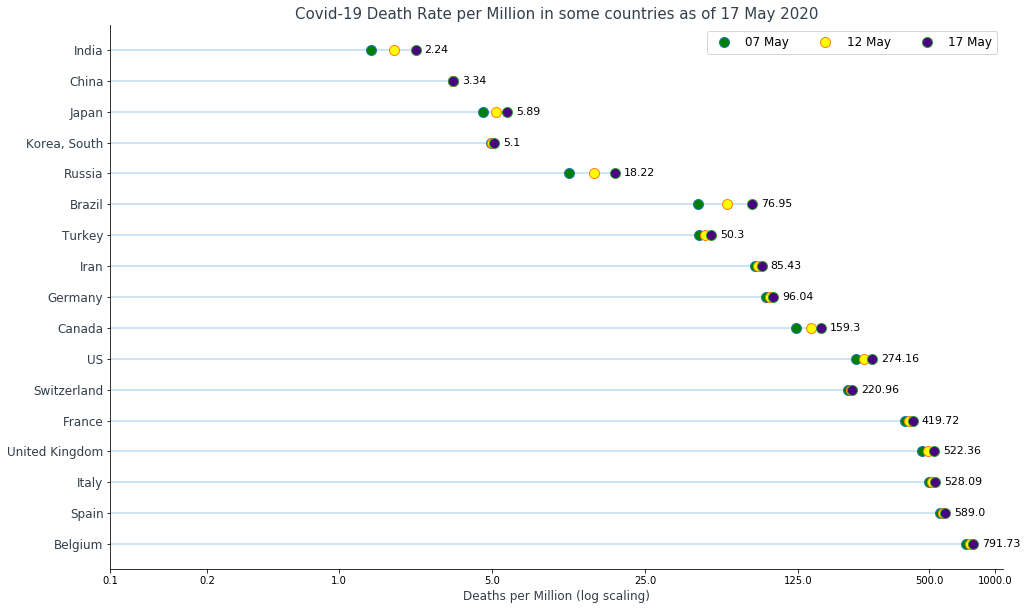

In [11]:
PlotDPM(list_of_countries)